### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [1]:
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
import wrangle as wr

# plotting defaults
plt.rc('figure', figsize=(10, 4))
plt.rc('font', size=16)

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [2]:
#wrangle file pulls in data from swl data base and spits into dataframe of total df and by class df's
df,ds_df, web_df, staff_df = wr.prepare_log()

### Which lesson appears to attract the most traffic consistently across cohorts (per program)?

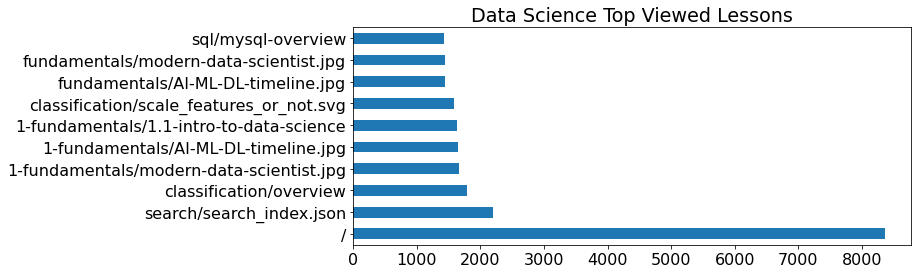

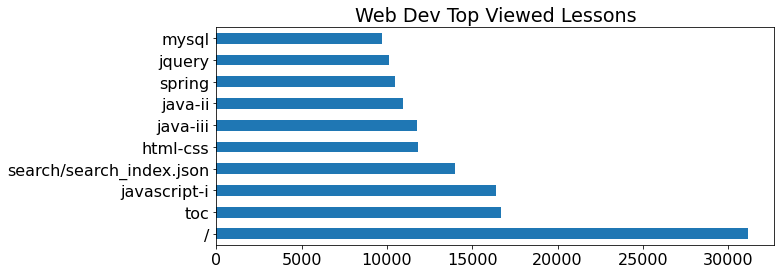

In [3]:
ds_df.endpoint.value_counts(dropna=False).head(10).plot.barh()
plt.title("Data Science Top Viewed Lessons")
plt.show()
web_df.endpoint.value_counts(dropna=False).head(10).plot.barh()
plt.title("Web Dev Top Viewed Lessons")
plt.show()

#### Takeaways
- For Data Science the most viewed lesson was the overview of classification

- For Web Development the most viewed lesson was Javascript-i

### Which lessons are least accessed? 

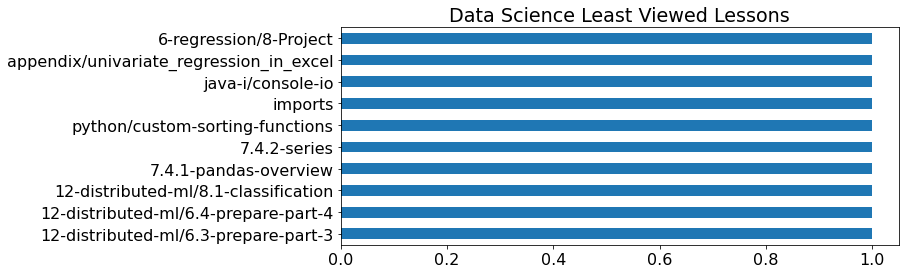

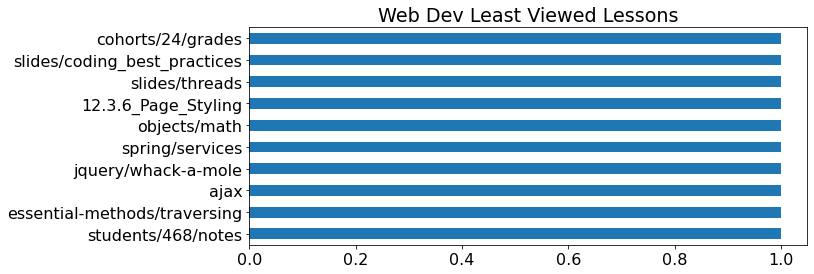

In [4]:
ds_df.endpoint.value_counts(dropna=False).tail(10).plot.barh()
plt.title("Data Science Least Viewed Lessons")
plt.show()
web_df.endpoint.value_counts(dropna=False).tail(10).plot.barh()
plt.title("Web Dev Least Viewed Lessons")
plt.show()

#### Takeaways
- For Data Science some of the least viewed lesson(s) were: appendix/univariate_regression_in_excel, java-i/console-io, python/custom-sorting-functions,imports

- For Web Development some of the least viewed lesson(s) were: essential-methods/traversing, ajax, jquery/whack-a-mole, spring/services, objects/math

## Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

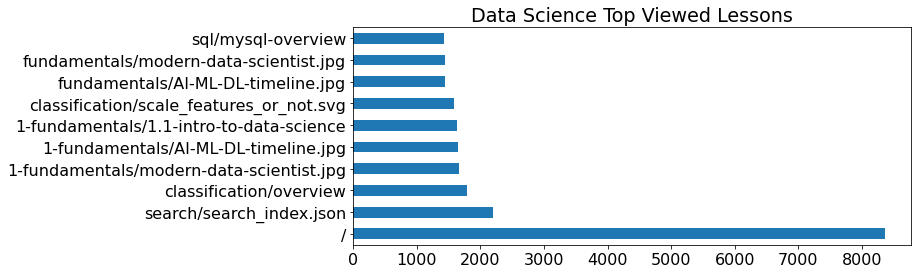

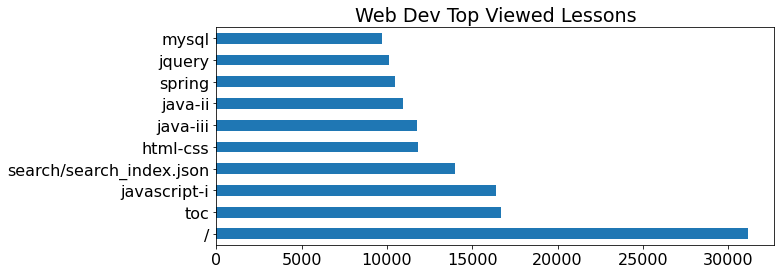

In [5]:
ds_df.endpoint.value_counts(dropna=False).head(10).plot.barh()
plt.title("Data Science Top Viewed Lessons")
plt.show()
web_df.endpoint.value_counts(dropna=False).head(10).plot.barh()
plt.title("Web Dev Top Viewed Lessons")
plt.show()

Cohort : Bayes


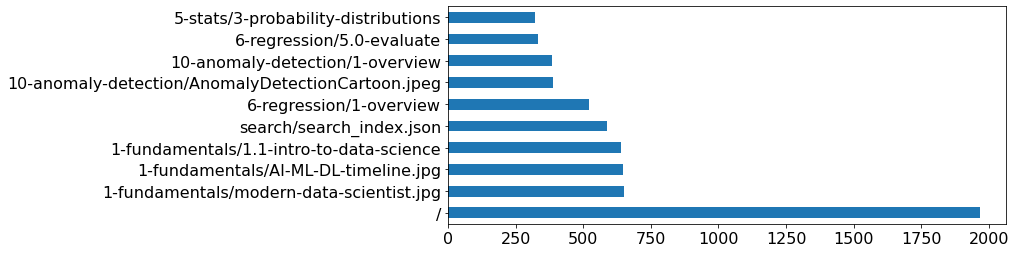

Cohort : Curie


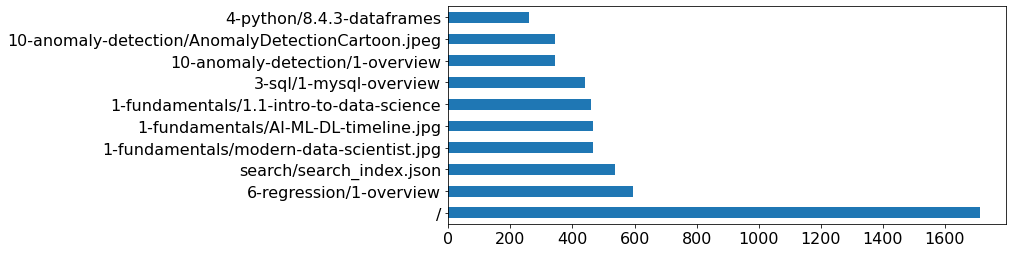

Cohort : Darden


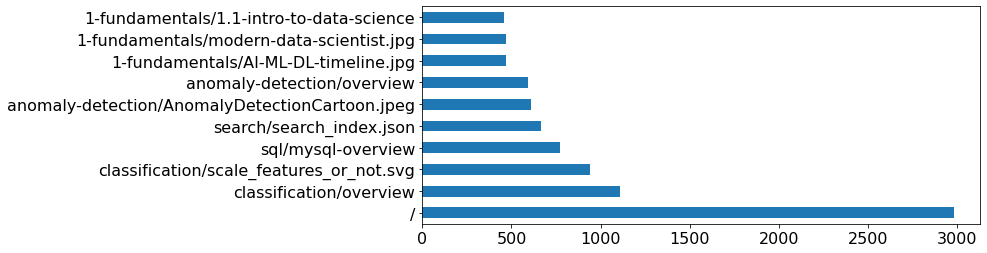

Cohort : Easley


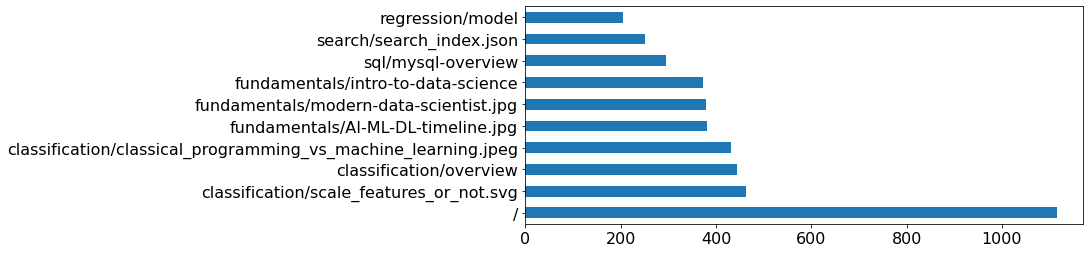

Cohort : Florence


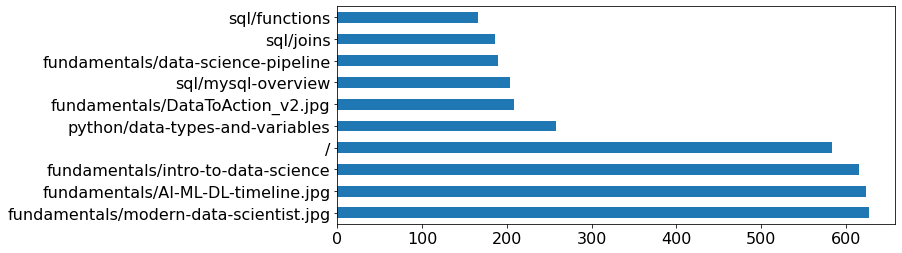

In [6]:
# create a list for the unique data science cohort name
val= list(ds_df.cohort_name.unique())

# loop through each unique cohort name and barchart plot the top and bottom 15 observations
for x in val:
    print(f'Cohort : {x}')
    ds_sub_df= ds_df[ds_df.cohort_name== x]
    ds_sub_df.endpoint.value_counts().head(10).plot(kind='barh')
    plt.show()

In [7]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )


In [8]:
bayes_df = ds_df[ds_df.cohort_name== 'Bayes'].endpoint.value_counts().head(10)
bayes_df

/                                                    1967
1-fundamentals/modern-data-scientist.jpg              650
1-fundamentals/AI-ML-DL-timeline.jpg                  648
1-fundamentals/1.1-intro-to-data-science              640
search/search_index.json                              588
6-regression/1-overview                               521
10-anomaly-detection/AnomalyDetectionCartoon.jpeg     387
10-anomaly-detection/1-overview                       384
6-regression/5.0-evaluate                             333
5-stats/3-probability-distributions                   320
Name: endpoint, dtype: int64

In [9]:
curies_df = ds_df[ds_df.cohort_name== 'Curie'].endpoint.value_counts().head(10)
curies_df

/                                                    1712
6-regression/1-overview                               595
search/search_index.json                              538
1-fundamentals/modern-data-scientist.jpg              467
1-fundamentals/AI-ML-DL-timeline.jpg                  465
1-fundamentals/1.1-intro-to-data-science              461
3-sql/1-mysql-overview                                441
10-anomaly-detection/1-overview                       345
10-anomaly-detection/AnomalyDetectionCartoon.jpeg     345
4-python/8.4.3-dataframes                             260
Name: endpoint, dtype: int64

In [10]:
darden_df = ds_df[ds_df.cohort_name== 'Darden'].endpoint.value_counts().head(10)

darden_df

/                                                 2980
classification/overview                           1109
classification/scale_features_or_not.svg           943
sql/mysql-overview                                 774
search/search_index.json                           664
anomaly-detection/AnomalyDetectionCartoon.jpeg     612
anomaly-detection/overview                         592
1-fundamentals/AI-ML-DL-timeline.jpg               470
1-fundamentals/modern-data-scientist.jpg           470
1-fundamentals/1.1-intro-to-data-science           460
Name: endpoint, dtype: int64

In [11]:
easley_df = ds_df[ds_df.cohort_name== 'Easley'].endpoint.value_counts().head(10)
easley_df

/                                                                1115
classification/scale_features_or_not.svg                          463
classification/overview                                           445
classification/classical_programming_vs_machine_learning.jpeg     432
fundamentals/AI-ML-DL-timeline.jpg                                381
fundamentals/modern-data-scientist.jpg                            379
fundamentals/intro-to-data-science                                372
sql/mysql-overview                                                295
search/search_index.json                                          251
regression/model                                                  204
Name: endpoint, dtype: int64

In [12]:
florence_df = ds_df[ds_df.cohort_name== 'Florence'].endpoint.value_counts().head(10)
florence_df

fundamentals/modern-data-scientist.jpg    627
fundamentals/AI-ML-DL-timeline.jpg        624
fundamentals/intro-to-data-science        615
/                                         584
python/data-types-and-variables           258
fundamentals/DataToAction_v2.jpg          208
sql/mysql-overview                        203
fundamentals/data-science-pipeline        189
sql/joins                                 186
sql/functions                             166
Name: endpoint, dtype: int64

### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [13]:
# unique pages visited 
ds_pages= list(ds_df.endpoint.unique())

# list of unique pages in web dev
web_pages = list(web_df.endpoint.unique())

# creating a loop that that allows for matching pages to be counted

count= 0
lst=[]
for x in web_pages:
    if x in ds_pages:
        count+= 1
        lst.append(x)
        
print(count)

127


In [14]:
lst

['/',
 'java-ii',
 'java-ii/object-oriented-programming',
 'javascript-i/conditionals',
 'mkdocs/search_index.json',
 'javascript-i',
 'spring',
 'appendix',
 'index.html',
 'java-i',
 'html-css/introduction',
 'javascript-i/bom-and-dom/dom',
 'mysql',
 'html-css',
 'git/cli',
 'appendix/documentation',
 'jquery',
 'javascript-ii',
 'html-css/elements',
 'html-css/forms',
 'java-iii',
 'spring/extra-features/error-pages',
 'java-i/console-io',
 'git',
 'spring/extra-features/error-pages/asdfasdf',
 'appendix/postwork',
 'appendix/git/intellij-intro',
 'appendix/git/intellij',
 'appendix/git/cli',
 'appendix/git',
 'functions',
 'group-by',
 '.gitignore',
 'toc',
 'search/search_index.json',
 'login',
 'examples',
 'Pipeline_Demo',
 'database-design',
 'AnomalyDetectionCartoon.jpeg',
 'search',
 '3-sql/1-mysql-overview',
 '4-python/1-overview',
 '4-python/2-introduction-to-python',
 '4-python/3-data-types-and-variables',
 '1-fundamentals/2.2-excel-functions',
 '1-fundamentals/2.3-visual

In [15]:
new_df = pd.DataFrame()
for x in lst:
   a = df[df.endpoint == x]
   new_df = pd.concat([new_df, a])
new_df

,time,endpoint,user_id,ip,cohort_name,start_date,end_date,program_id
date,,,,,,,,
2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,10:00:37,/,6,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
2018-01-26,10:14:47,/,11,97.105.19.61,Arches,2014-02-04,2014-04-22,1
2018-01-26,10:14:53,/,6,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
2018-01-26,10:18:22,/,10,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2
...,...,...,...,...,...,...,...,...
2021-03-25,11:10:29,fundamentals/vocabulary,844,24.160.7.8,Easley,2020-12-07,2021-06-08,3
2021-03-25,13:23:30,fundamentals/vocabulary,64,71.150.217.33,Staff,2014-02-04,2014-02-04,2
2021-03-25,18:09:49,fundamentals/vocabulary,913,68.77.133.109,Florence,2021-03-15,2021-09-03,3
